This notebook is intended to evaluate if the quality of switch games has increased as the system's lifecycle has gone on based on Metacritic reviews. Data from Metacritic collected on 8/4/21. https://www.metacritic.com/browse/games/score/metascore/all/switch/filtered?view=condensed

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
gamelist = pd.read_excel('Metacritic_switch100.xlsx',sheet_name='Sheet2')
gamelist.head(3)

,Metascore,Place,Title,ReleaseDate
0,98,1,The House in Fata Morgana - Dreams of the Reve...,2021-04-09
1,97,2,The Legend of Zelda: Breath of the Wild,2017-03-03
2,97,3,Super Mario Odyssey,2017-10-27


In [20]:
gamelist['ReleaseYear'] = gamelist['ReleaseDate'].dt.year
gamelist['ReleaseMonth'] = gamelist['ReleaseDate'].dt.month

<AxesSubplot:xlabel='ReleaseYear', ylabel='Metascore'>

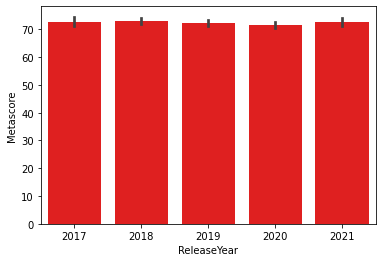

In [21]:
sns.barplot(x='ReleaseYear',y='Metascore',data=gamelist,color='red')

<AxesSubplot:xlabel='ReleaseMonth', ylabel='Metascore'>

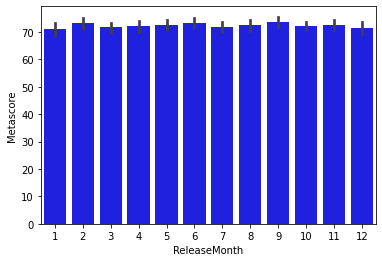

In [22]:
sns.barplot(x='ReleaseMonth',y='Metascore',data=gamelist,color='blue')

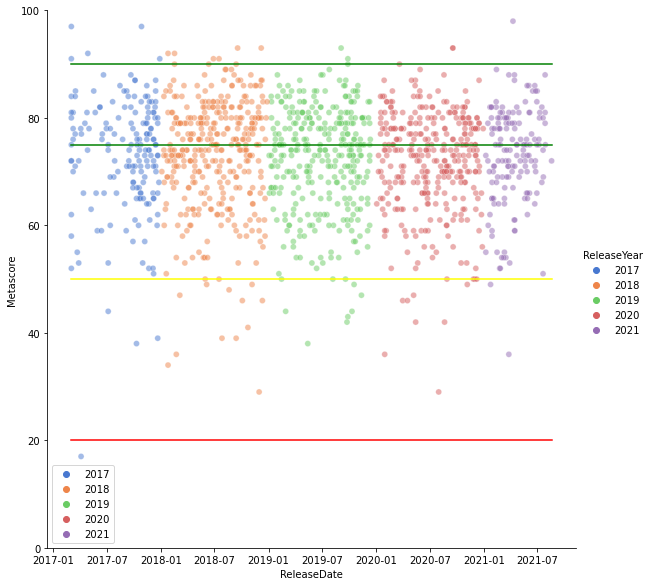

In [92]:
sns.relplot(x='ReleaseDate',y='Metascore',data=gamelist,hue='ReleaseYear',alpha=0.5,palette='muted',height=8)
sns.lineplot(x=[gamelist['ReleaseDate'].min(),gamelist['ReleaseDate'].max()],y=[90,90],color='green')
sns.lineplot(x=[gamelist['ReleaseDate'].min(),gamelist['ReleaseDate'].max()],y=[75,75],color='green')
sns.lineplot(x=[gamelist['ReleaseDate'].min(),gamelist['ReleaseDate'].max()],y=[50,50],color='yellow')
sns.lineplot(x=[gamelist['ReleaseDate'].min(),gamelist['ReleaseDate'].max()],y=[20,20],color='red')
plt.ylim(0,100)
plt.show;

<AxesSubplot:xlabel='ReleaseYear', ylabel='Metascore'>

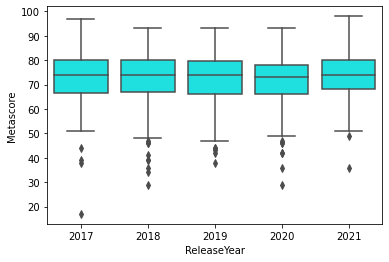

In [47]:
sns.boxplot(x='ReleaseYear',y='Metascore',data=gamelist,color='cyan')

90-100 = Universal Acclaim
75-89 = Generally Favorable Reviews
50-74 = Mixed or Average Reviews
20-49 = Generally Unfavorable Reviews
0-19 = Overwhelming Dislike

In [132]:
gamelist['Universal Acclaim'] = gamelist['Metascore']>=90
gamelist['Generally Favorable'] = (gamelist['Metascore']>=75) & (gamelist['Metascore']<=89)
gamelist['Mixed or Average'] = (gamelist['Metascore']>=50) & (gamelist['Metascore']<=74)
gamelist['Generally Unfavorable'] = (gamelist['Metascore']>=20) & (gamelist['Metascore']<=49)
gamelist['Overwhelming Dislike'] = (gamelist['Metascore']>=0) & (gamelist['Metascore']<=19)
gamelist['count'] = gamelist['Metascore']>0
gamelist.head()

,Metascore,Place,Title,ReleaseDate,ReleaseYear,ReleaseMonth,Universal Acclaim,Generally Favorable,Mixed or Average,Generally Unfavorable,Overwhelming Dislike,count
0,98,1,The House in Fata Morgana - Dreams of the Reve...,2021-04-09,2021,4,True,False,False,False,False,True
1,97,2,The Legend of Zelda: Breath of the Wild,2017-03-03,2017,3,True,False,False,False,False,True
2,97,3,Super Mario Odyssey,2017-10-27,2017,10,True,False,False,False,False,True
3,93,4,Divinity: Original Sin II - Definitive Edition,2019-09-04,2019,9,True,False,False,False,False,True
4,93,5,Hades,2020-09-17,2020,9,True,False,False,False,False,True


In [133]:
yearcount = gamelist[['Universal Acclaim','Generally Favorable','Mixed or Average','Generally Unfavorable','Overwhelming Dislike','ReleaseYear','count']].groupby('ReleaseYear').sum()
yearcount.head()

,Universal Acclaim,Generally Favorable,Mixed or Average,Generally Unfavorable,Overwhelming Dislike,count
ReleaseYear,,,,,,
2017,5,80,83,3,1,172
2018,9,165,169,12,0,355
2019,3,149,167,7,0,326
2020,3,139,184,8,0,334
2021,1,74,78,2,0,155


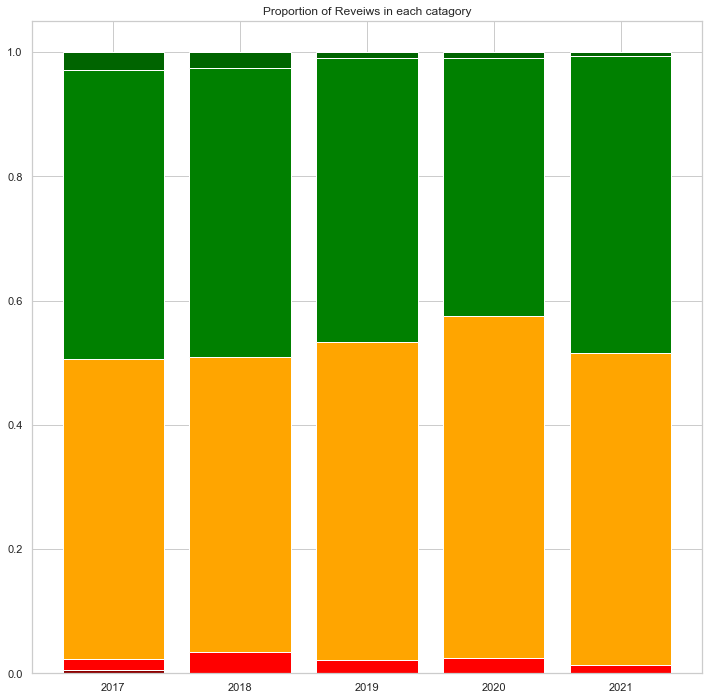

In [138]:
f, ax = plt.subplots(figsize=(12, 12))


plt.bar(yearcount.index,yearcount['Overwhelming Dislike']/yearcount['count'],
            label="Overwhelming Dislike", color="darkred")

plt.bar(yearcount.index,yearcount['Generally Unfavorable']/yearcount['count'], bottom=yearcount['Overwhelming Dislike']/yearcount['count'],
            label="Generally Unfavorable", color="red")

plt.bar(yearcount.index,yearcount['Mixed or Average']/yearcount['count'],bottom=(yearcount['Overwhelming Dislike']+yearcount['Generally Unfavorable'])/yearcount['count'],
            label="Mixed or Average", color="orange")

plt.bar(yearcount.index,yearcount['Generally Favorable']/yearcount['count'],
            bottom=(yearcount['Overwhelming Dislike']+yearcount['Generally Unfavorable']+yearcount['Mixed or Average'])/yearcount['count'],
            label="Generally Favorable", color="green")

plt.bar(yearcount.index,yearcount['Universal Acclaim']/yearcount['count'],
            bottom=(yearcount['Overwhelming Dislike']+yearcount['Generally Unfavorable']+yearcount['Mixed or Average']+yearcount['Generally Favorable'])/yearcount['count'],
            label="Universal Acclaim", color="darkgreen")
plt.title('Proportion of Reveiws in each catagory')
plt.show();


In [ ]:
f, ax = plt.subplots(figsize=(12, 12))


plt.bar(yearcount.index,yearcount['Overwhelming Dislike'],
            label="Overwhelming Dislike", color="darkred")

plt.bar(yearcount.index,yearcount['Generally Unfavorable'], bottom=yearcount['Overwhelming Dislike'],
            label="Generally Unfavorable", color="red")

plt.bar(yearcount.index,yearcount['Mixed or Average'],bottom=yearcount['Overwhelming Dislike']+yearcount['Generally Unfavorable'],
            label="Mixed or Average", color="orange")

plt.bar(yearcount.index,yearcount['Generally Favorable'],
            bottom=yearcount['Overwhelming Dislike']+yearcount['Generally Unfavorable']+yearcount['Mixed or Average'],
            label="Generally Favorable", color="green")

plt.bar(yearcount.index,yearcount['Universal Acclaim'],
            bottom=yearcount['Overwhelming Dislike']+yearcount['Generally Unfavorable']+yearcount['Mixed or Average']+yearcount['Generally Favorable'],
            label="Universal Acclaim", color="darkgreen")

# Add a legend and informative axis label
ax.legend(loc="upper right", frameon=True)
plt.show();


In [110]:
yearstats = gamelist[['Metascore','ReleaseYear']].groupby('ReleaseYear').describe()
yearstats.head().round(2)

Metascore                                              
                count   mean    std   min    25%   50%    75%   max
ReleaseYear                                                        
2017            172.0  72.80  11.06  17.0  66.75  74.0  80.00  97.0
2018            355.0  72.95  10.61  29.0  67.00  74.0  80.00  93.0
2019            326.0  72.20   9.85  38.0  66.00  74.0  79.75  93.0
2020            334.0  71.66   9.55  29.0  66.25  73.0  78.00  93.0
2021            155.0  72.75   9.43  36.0  68.00  74.0  80.00  98.0

In [72]:
yearstats.columns = yearstats.columns.droplevel(level=0)
yearstats.head()

,count,mean,std,min,25%,50%,75%,max
ReleaseYear,,,,,,,,
2017,172.0,72.802326,11.061043,17.0,66.75,74.0,80.00,97.0
2018,355.0,72.949296,10.608744,29.0,67.00,74.0,80.00,93.0
2019,326.0,72.196319,9.852362,38.0,66.00,74.0,79.75,93.0
2020,334.0,71.664671,9.549687,29.0,66.25,73.0,78.00,93.0
2021,155.0,72.754839,9.428020,36.0,68.00,74.0,80.00,98.0


Text(0, 0.5, 'Metascore')

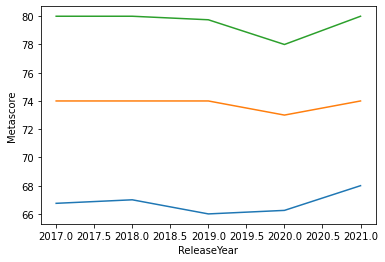

In [73]:
lineplot = sns.lineplot(x='ReleaseYear',y='25%',data=yearstats)
lineplot = sns.lineplot(x='ReleaseYear',y='50%',data=yearstats)
lineplot = sns.lineplot(x='ReleaseYear',y='75%',data=yearstats)
plt.ylabel('Metascore')

<AxesSubplot:xlabel='ReleaseYear', ylabel='std'>

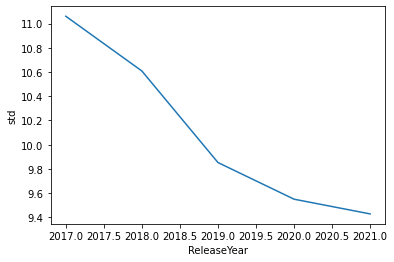

In [43]:
sns.lineplot(x='ReleaseYear',y='std',data=yearstats)

In [53]:
threesig = np.mean(gamelist['Metascore'])-3*np.std(gamelist['Metascore'])
gamelist3sig = gamelist[gamelist['Metascore'] >= threesig]

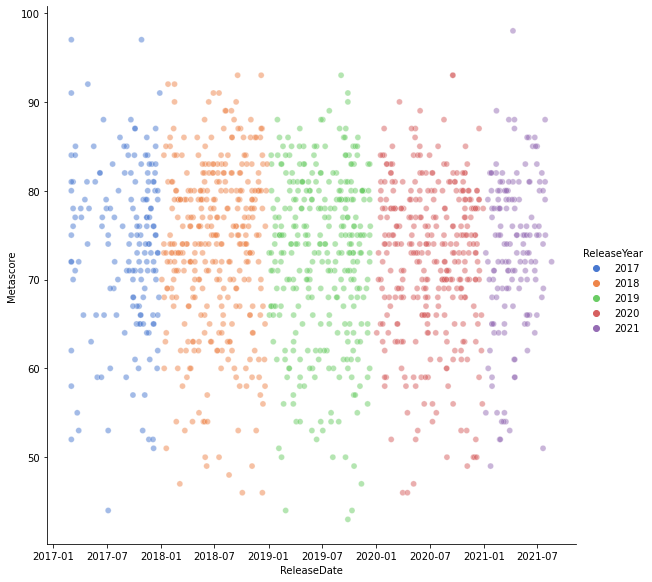

In [54]:
sns.relplot(x='ReleaseDate',y='Metascore',data=gamelist3sig,hue='ReleaseYear',alpha=0.5,palette='muted',height=8)

In [57]:
yearstats3sig = gamelist3sig[['Metascore','ReleaseYear']].groupby('ReleaseYear').describe()
yearstats3sig.columns = yearstats3sig.columns.droplevel(level=0)
yearstats3sig.head()

,count,mean,std,min,25%,50%,75%,max
ReleaseYear,,,,,,,,
2017,169.0,73.538462,9.562451,44.0,67.00,75.0,80.0,97.0
2018,349.0,73.578797,9.523577,46.0,68.00,74.0,80.0,93.0
2019,324.0,72.395062,9.549193,43.0,66.75,74.0,80.0,93.0
2020,330.0,72.081818,8.796723,46.0,67.00,73.0,78.0,93.0
2021,154.0,72.993506,8.976729,49.0,68.25,74.0,80.0,98.0


In [61]:
yearstats3sig['duds'] = yearstats['count'] - yearstats3sig['count']
yearstats3sig['dud_pct'] = round(yearstats3sig['duds']/yearstats['count']*100,2)
yearstats3sig.head()

,count,mean,std,min,25%,50%,75%,max,duds,dud_pct
ReleaseYear,,,,,,,,,,
2017,169.0,73.538462,9.562451,44.0,67.00,75.0,80.0,97.0,3.0,1.74
2018,349.0,73.578797,9.523577,46.0,68.00,74.0,80.0,93.0,6.0,1.69
2019,324.0,72.395062,9.549193,43.0,66.75,74.0,80.0,93.0,2.0,0.61
2020,330.0,72.081818,8.796723,46.0,67.00,73.0,78.0,93.0,4.0,1.20
2021,154.0,72.993506,8.976729,49.0,68.25,74.0,80.0,98.0,1.0,0.65


<AxesSubplot:xlabel='ReleaseYear', ylabel='25%'>

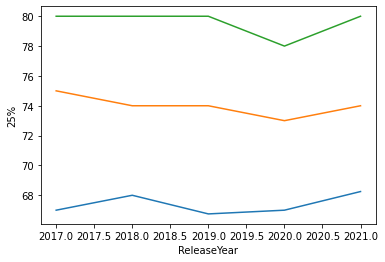

In [63]:
sns.lineplot(x='ReleaseYear',y='25%',data=yearstats3sig)
sns.lineplot(x='ReleaseYear',y='50%',data=yearstats3sig)
sns.lineplot(x='ReleaseYear',y='75%',data=yearstats3sig)
plt

<AxesSubplot:xlabel='ReleaseYear', ylabel='std'>

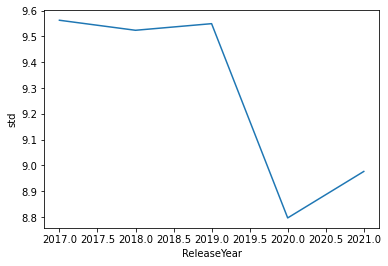

In [62]:
sns.lineplot(x='ReleaseYear',y='std',data=yearstats3sig)

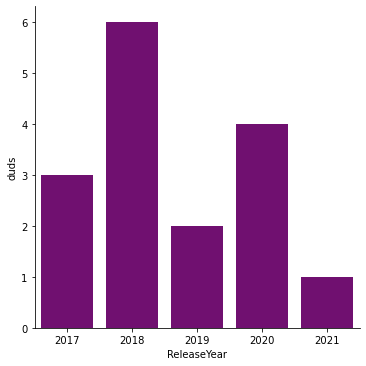

In [77]:
sns.catplot(x=yearstats3sig.index,y='duds',kind='bar',data=yearstats3sig,color='purple')

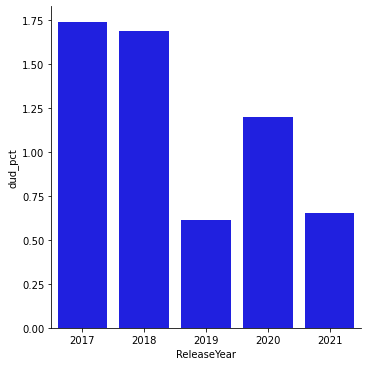

In [79]:
sns.catplot(x=yearstats3sig.index,y='dud_pct',kind='bar',data=yearstats3sig,color='blue')